In [13]:
#install required packages
install.packages("tidyverse")
 install.packages("ggplot2")
 install.packages("tidymodels")
 install.packages("readr")
 install.packages("psych")
 install.packages("corrplot")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pillar’, ‘cli’, ‘dplyr’, ‘hardhat’, ‘recipes’, ‘yardstick’


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [1]:
library(tidyverse)
library(ggplot2)
options(repr.matrix.max.rows = 6)
library(repr)
library(readr)
library(psych)
library(gridExtra)
library(dplyr)
library(broom)
library(corrplot)
library(infer)
options(warn=-1)
suppressWarnings(expr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.92 loaded



function (expr) 
{
    enexpr(expr)
}
<bytecode: 0x55cc0a4841a0>
<environment: namespace:rlang>

In [2]:
# A helper function to generate figure numbers
create_caption <- function (figure_number, title) {
    print(paste(sprintf("Figure #%d:", figure_number), title))
}
create_caption(0, "Hello, world!")

[1] "Figure #0: Hello, world!"


In [3]:
library(infer)

In [4]:
# The seed used for the entirety of our analysis
SEED <- 12345

Impact of Romantic Relationships on Academic Performance in Secondary Education


**Abstract** This study examines the impact of romantic relationships on academic performance among students by comparing two groups: those who are in romantic relationships and those who are not. 

## I.Introduction

#### 1.1. Background 

Romantic relationships during adolescence and young adulthood are a common and significant aspect of many students' lives. These relationships play a crucial role in the emotional and social development of young individuals, offering experiences that contribute to their personal growth and identity formation. As students navigate the complexities of academics and social interactions, the influence of romantic relationships on their academic performance has become a subject of interest for researchers and educators alike. While romantic relationships can foster emotional support and companionship, studies have indicated that they may also impact students' academic achievements. Some research suggests a negative correlation between young adult romantic relationships and academic performance (Hallfors et al., 2005). This negative association raises questions about how these relationships might affect students' dedication to their studies and engagement in learning activities.

Moreover, recent studies have raised concerns about the potential risks associated with romantic involvement during adolescence. It has been reported that young adults involved in relationships are more likely to engage in risky behaviors, leading to compromised academic performance (Honghao et al., 2021). Such behaviors may include increased involvement in social activities or prioritizing time spent with their partners over study time.

To shed light on the relationship between romantic involvement, study time, and academic performance, this study aims to compare two distinct groups of students: those who are in romantic relationships and those who are not. By analyzing the final grades of students in both groups and considering study time as a random variable, we intend to assess how these groups perform in exams. The response variable will be the mean final grade for each group, providing insights into any potential differences in academic performance.

#### 1.2. Research Question

- Does the romantic relationship status of students have a statistically significant impact on their academic performance? 
- Using inferential statistics, we aim to compare the mean final grades of students in romantic relationships and those who are not, while controlling for the random variable of study time.


#### 1.3. Data set

To support this analysis, we have selected a dataset from the Student Performance Data Set (https://archive.ics.uci.edu/dataset/320/student+performance). This dataset includes a wealth of information on students' academic achievements, study habits, and romantic relationship status. Through this study, we seek to contribute to the existing body of knowledge on the intersection of romantic relationships and academic performance, and potentially inform educational institutions and stakeholders on strategies to support students in achieving a balance between their personal lives and academic goals. Understanding the dynamics between romantic relationships and academic outcomes can help foster a conducive learning environment that nurtures both emotional well-being and scholastic excellence.


We'll need four columns from the data set:

| Column   | Description                                                                 | Notes                                               |
|----------|-----------------------------------------------------------------------------|-----------------------------------------------------|
| G3       | "Final grade of the student"                                               | We'll analyze this column as the response variable. |
| studytime| "Weekly study time (in hours)"                                             | This column will serve as the random variable.      |
| sex      | "male or female"                                                         | We'll consider gender as a categorical variable.    |
| romantic | "Indication of whether the student is involved in a romantic relationship" | This column will be used to categorize the groups.  |


#### 1.4. variables of interest:

1. Romantic Relationship Status (romantic): This categorical variable indicates whether a student is involved in a romantic relationship or not. It will serve as our primary grouping factor for comparing academic performance.
2. Final Grade (G3): This numeric variable represents the final grade of each student. We will analyze this variable to assess students' academic performance.
3. Gender and duration of study are our auxiliary control variables.

We will be studying the change of this value from 2017 to 2020 across three different Vancouver neighborhoods, each characteristic of a different level of wealth. Thus, our location parameter is a proportion with an error reported by its standard error, which can be computed via bootstrapping, asymptotics, or mathematically, with the formula:
#### 1.5. Response variable parameters：
1. Mean:
Let G3 represent the final grade of students in our dataset. The mean of the final grades is denoted by the symbol μ, and it is calculated as follows:
$$
μ = (1/n) * Σ(G3i)                   
$$
Where n represents the number of students in the dataset, and G3i represents the final grade of each individual student.
2. Standard Deviation：
$$
σ = √((1/n) * Σ(G3i - μ)²)               
$$
Where μ is the mean of the final grades, and G3i represents the final grade of each individual student.

- These formulas will now consider the final grades (G3) as the variable of interest and allow us to calculate the mean and standard deviation for academic performance within each group (students in romantic relationships and those not in romantic relationships).


## II.Preliminary Results
#### 2.1. The first is about reading and look data （Alrerady upload to Group 29 public Github repoositry).

In [5]:
url <- "https://raw.githubusercontent.com/tiffanyw10/stat201/main/student-mat.csv"
student_data <- read_delim(url)
head(student_data, n = 3)
tail(student_data, n = 3)
create_caption(1, "Student Information Exploration.")

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,5,3,3,3,3,3,10,8,7
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,0,11,12,10
MS,M,19,U,LE3,T,1,1,other,at_home,⋯,3,2,3,3,3,5,5,8,9,9


[1] "Figure #1: Student Information Exploration."


#### 2.2. Data cleaning and viewing for missing values - We can see that there are no missing values.

In [6]:
# Count the number of missing values in each column
missing_values_per_column <- colSums(is.na(student_data))
# Print the columns with their respective counts of missing values
missing_values_per_column

school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         0          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          0          0          0          0 
    health   absences         G1         G2         G3 
         0          0          0          0          0

Our data is already of the Tidy type. By tidy, we're verifying (from the DSCI 100 course textbook [[Data Science: A First Introduction, 12]](https://ubc-dsci.github.io/introduction-to-datascience/): 
> * each row is a single observation,
> * each column is a single variable, and
> * each value is a single cell
> * no miss

Also, This data is without missing values, according to the website description (https://archive.ics.uci.edu/dataset/320/student+performance).

#### 2.3. Establishing sample for further research

In [7]:
set.seed(123)
# Create a random sample of size 50 from the student_data dataset without replacement
sample_data <- rep_sample_n(student_data, size = 50, replace = FALSE)

# Display the randomly sampled data
sample_data
create_caption(2, "sample_data.")

replicate,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GP,M,16,R,GT3,T,4,2,teacher,⋯,4,3,3,3,4,3,10,10,8,9
1,GP,M,15,U,GT3,T,4,3,teacher,⋯,5,4,3,1,2,3,2,10,10,11
1,GP,M,16,U,GT3,T,2,3,other,⋯,5,3,3,1,1,3,0,13,14,14
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,GP,M,15,U,GT3,T,4,3,teacher,⋯,2,2,2,1,1,3,0,7,9,0
1,GP,F,17,R,GT3,T,4,3,teacher,⋯,4,4,2,1,1,4,6,7,7,7
1,MS,M,18,R,GT3,T,4,2,other,⋯,5,4,3,4,3,3,14,6,5,5


[1] "Figure #2: sample_data."


[1] "Figure #3: sample distribution of g3 grades."


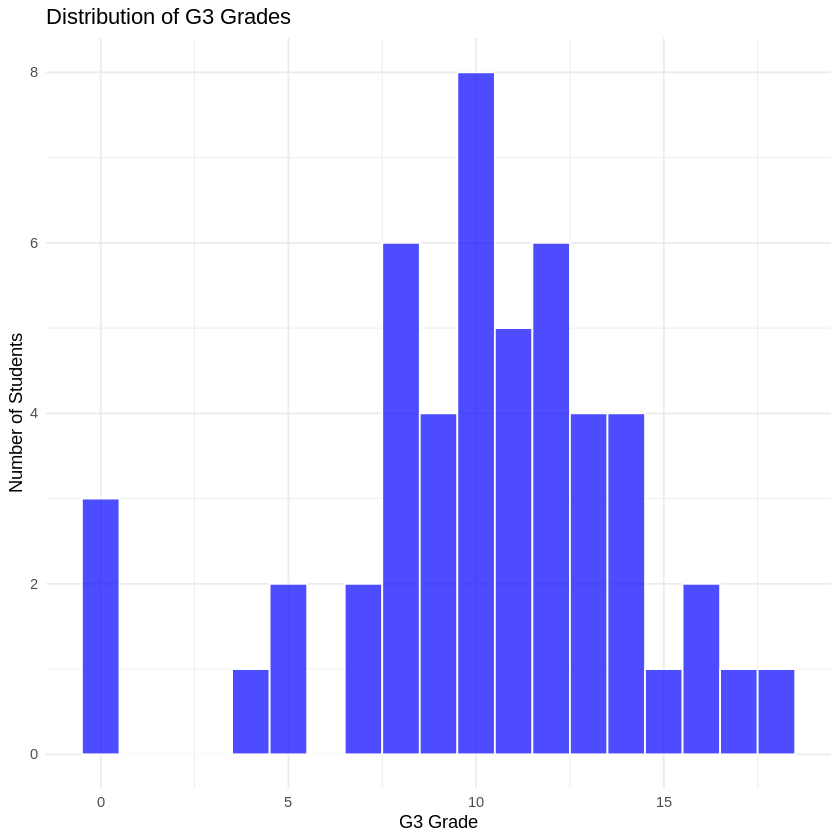

In [8]:
set.seed(123)

# Create a histogram to visualize the distribution of G3 grades
sample_dist <- ggplot(sample_data, aes(x = G3)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "white", alpha = 0.7) +
  
  # Add title and axis labels
  labs(title = "Distribution of G3 Grades", x = "G3 Grade", y = "Number of Students") +
  
  # Use a minimal theme
  theme_minimal()

# Display the histogram
sample_dist
create_caption(3, "sample distribution of g3 grades.")

#### 2.4. New samples using the bootstrap method

[1] "Figure #4: bootstrap distribution of g3 grades."


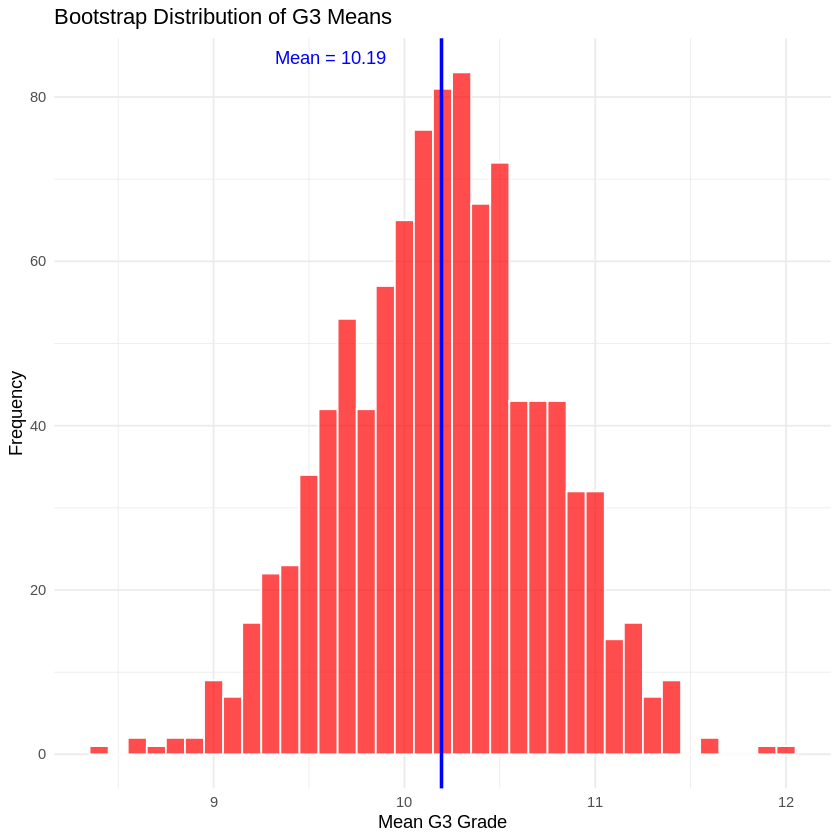

In [9]:
# Set the random number generator seed for reproducibility
set.seed(123)

# Create a bootstrap sample with replacement
bootstrap_sample <- rep_sample_n(sample_data, size = 50, replace = TRUE, reps = 1000)

# Calculate means for each replicate
bootstrap_means <- bootstrap_sample %>%
  group_by(replicate) %>%
  summarise(mean_G3 = mean(G3))

# Calculate the overall mean of the bootstrap means
overall_mean <- mean(bootstrap_means$mean_G3)

# Create a histogram to visualize the bootstrap distribution of means
bootstrap_dist <- ggplot(bootstrap_means, aes(x = mean_G3)) +
  geom_histogram(binwidth = 0.1, fill = "red", color = "white", alpha = 0.7) +
  geom_vline(aes(xintercept = overall_mean), color = "blue", size = 1) + 
  annotate("text", x = overall_mean, y = Inf, label = paste("Mean =", round(overall_mean, 2)), 
           vjust = 2, hjust = 1.5, color = "blue") +
  labs(title = "Bootstrap Distribution of G3 Means", x = "Mean G3 Grade", y = "Frequency") +
  theme_minimal()

# Display the bootstrap distribution plot
bootstrap_dist
create_caption(4, "bootstrap distribution of g3 grades.")

#### 2.5.Next we would like to explore some descriptive statistics for our numerical variables.
- We will use the psych library in our data analysis to perform various statistical computations and analyses related to the variables of interest.
- This library provides useful functions for calculating descriptive statistics, including means and standard deviations, as well as conducting hypothesis testing and factor analysis to gain deeper insights into the relationship between romantic relationship status and academic performance. By leveraging the capabilities of the psych library, we can ensure robust and reliable results for our research (https://cran.r-project.org/web/packages/psych/index.html).

In [10]:
# filter the data and only for columns we want look stat describe
numerical_columns <- bootstrap_sample %>%
    ungroup() %>%
    select(G3, studytime)
numerical_columns
create_caption(5, "numerical_columns.")

G3,studytime
<dbl>,<dbl>
11,3
16,1
8,1
⋮,⋮
8,1
10,1
16,1


[1] "Figure #5: numerical_columns."


In [11]:
# use describe and assign the result to a variable
# here we use library psych ,this is a library commonly used in cognitive science to explain statistical variables.
student_data_desc <- psych::describe(numerical_columns)
student_data_desc
create_caption(6, "Variable stat summary.")

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G3,1,50000,10.19446,3.9122872,10,10.4695,2.9652,0,18,18,-0.7328710,0.8686991,0.017496280
studytime,2,50000,2.11664,0.9713156,2,2.0208,1.4826,1,4,3,0.5481132,-0.6629552,0.004343855


[1] "Figure #6: Variable stat summary."


#### 2.6. Let's examine the distribution of students' gender and their relationship status to further analyze the data.

In [12]:
# Calculate the count of observations for each level of the "romantic" variable
romantic_count <- bootstrap_sample %>%
  group_by(romantic) %>%
  summarise(n = n(), .groups = 'drop')

# Display the count of observations for each level of "romantic"
romantic_count
create_caption(7, "Romantic status counts")

romantic,n
<chr>,<int>
no,33059
yes,16941


[1] "Figure #7: Romantic status counts"


In [13]:
# Next we look at the different gender distributions
gender_distribution <- table(bootstrap_sample$sex)
gender_distribution


    F     M 
15941 34059 

#### 2.7. Data Visualization
In this section, we have conducted data visualization to explore the dynamics between students' gender, study time, and romantic relationship status. The visualizations provide valuable insights into the following aspects:

- Romantic Relationship Status by Gender:
This bar plot allows us to examine the proportion of male and female students engaged in romantic relationships. By comparing the two groups, we can identify any gender-related differences in romantic involvement, helping us understand the distribution of relationship statuses across genders.

- Distribution of Study Time for Students in Romantic Relationships:
Through a grouped bar plot, we analyze the study time distribution for students in romantic relationships. This visualization helps us observe the study habits of students who are romantically involved and uncover any trends or patterns in their study time allocation.

- Average Study Time for All Students:
The histogram illustrates the overall distribution of average study time among all students in the dataset. This visualization allows us to grasp the central tendency of study time across the entire student population, aiding in identifying the typical study patterns.

- istribution of Students in Romantic Relationships:
By utilizing a bar plot, we explore the count of students categorized based on their romantic relationship status. This visualization provides a clear comparison between students in romantic relationships and those not in relationships, highlighting the prevalence of romantic involvement among the students.

These visualizations serve as valuable exploratory tools to understand the data's characteristics and lay the foundation for further statistical analyses. They help us identify potential trends, associations, and patterns, which will be instrumental in addressing our research question regarding the impact of romantic relationship status on students' academic performance.

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


[1] "Figure #8: Data exploration and main distribution visualization"


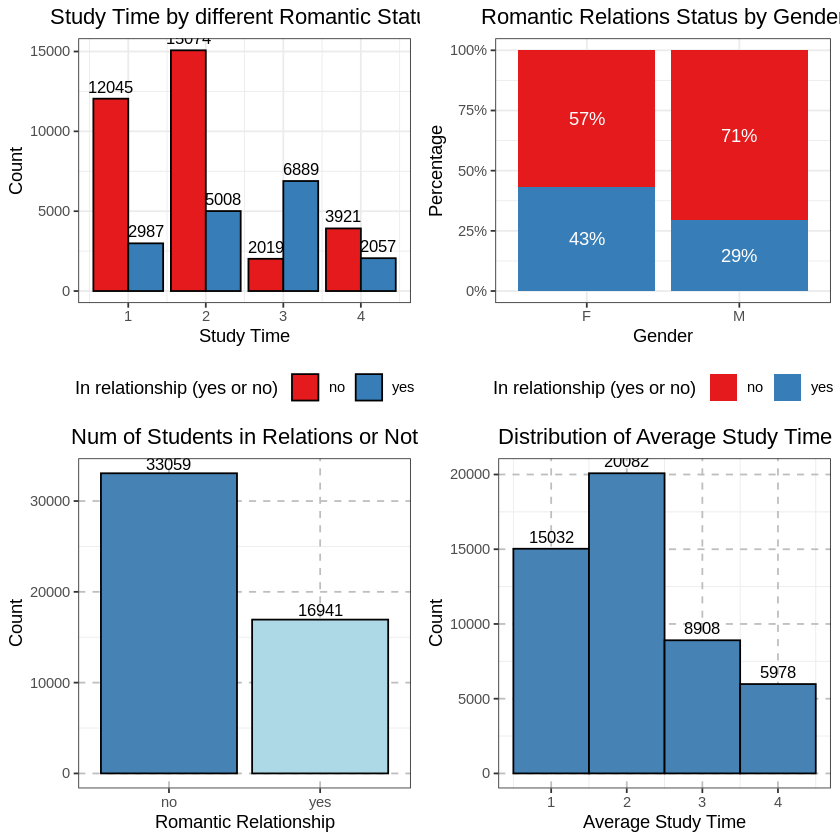

In [14]:
# Calculate counts
romantic_gender_count <- bootstrap_sample %>%
  group_by(sex, romantic) %>%
  summarise(n = n()) %>%
  mutate(percentage = n / sum(n))
# Visualization
romantic_gender_distribution <- ggplot(romantic_gender_count, aes(x=sex, y=percentage, fill=romantic)) +
  geom_bar(stat="identity") +
  geom_text(aes(label = scales::percent(percentage)), 
            position = position_stack(vjust = 0.5), color = "white") +
  scale_fill_brewer(palette="Set1") +
  labs(title="Romantic Relations Status by Gender", x="Gender", y="Percentage", fill="In relationship (yes or no)") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_bw() +
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.position = "bottom"
  )
# create histogram of average study time
student_study_time_plot <- ggplot(bootstrap_sample, aes(x=studytime)) +
  geom_histogram(binwidth=1, fill = "steelblue", color = "black", aes(y = ..count..)) +
  geom_text(stat='bin', aes(label=..count..), vjust=-0.5, color="black", size=3.5, binwidth=1) +
  scale_x_continuous(name = "Average Study Time", 
                     breaks = seq(0, max(student_data$studytime, na.rm = TRUE), by = 1)) +
  scale_y_continuous(name = "Count") +
  labs(title = "Distribution of Average Study Time") +
  theme_bw() +
  theme(
    plot.title = element_text(hjust = 0.5),
    panel.grid.major = element_line(linetype = "dashed", color = "grey")
  )
# Calculate counts
studytime_counts <- bootstrap_sample %>%
  group_by(studytime, romantic) %>%
  summarise(count = n(), .groups = 'drop')

# Visualization of study time by romantic status
student_romantic_study_time <- ggplot(studytime_counts, aes(x=studytime, y=count, fill=romantic)) +
  geom_bar(stat="identity", position="dodge", color = "black") +
  geom_text(aes(label=count), position=position_dodge(width=0.9), vjust=-0.5, size=3.5) +
  scale_fill_brewer(palette="Set1") + 
  labs(title="Study Time by different Romantic Status", 
       x="Study Time", 
       y="Count", 
       fill="In relationship (yes or no)") +
  theme_bw() +
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.position = "bottom"
  )
romantic_distribution <- ggplot(data = romantic_count, aes(x = romantic, y = n, fill = romantic)) +
  geom_bar(stat = "identity", color = "black") +
  geom_text(aes(label=n), vjust=-0.3, size=3.5, color="black") +
  scale_fill_manual(values = c("steelblue", "lightblue")) +
  scale_x_discrete(name = "Romantic Relationship") +
  scale_y_continuous(name = "Count") +
  labs(title = "Num of Students in Relations or Not") +
  theme_bw() +
  theme(
    plot.title = element_text(hjust = 0.5),
    panel.grid.major = element_line(linetype = "dashed", color = "grey"),
    legend.position = "none"
  )
grid.arrange(
  student_romantic_study_time, romantic_gender_distribution,
  romantic_distribution, student_study_time_plot,
  ncol = 2)

create_caption(8, "Data exploration and main distribution visualization")

#### 2.8. Estimates of the parameter 
- The DataFrame presents parameter estimates across different gender groups. It includes the mean study time, mean final grade, and proportion of students in romantic relationships for each gender category. This information provides valuable insights into potential differences in academic performance and romantic involvement among male and female students.

In [15]:
# Calculate parameter estimates
parameter_estimates <- bootstrap_sample %>%
  group_by(sex) %>%
  summarise(
    Mean_Study_Time = mean(studytime),
    Mean_Final_Grade = mean(G3),
    Proportion_Romantic = mean(romantic == "yes")
  )
# Create a DataFrame
parameter_df <- data.frame(
  Gender = parameter_estimates$sex,
  Mean_Study_Time = parameter_estimates$Mean_Study_Time,
  Mean_Final_Grade = parameter_estimates$Mean_Final_Grade,
  Proportion_Romantic = parameter_estimates$Proportion_Romantic
)
# Print the DataFrame
parameter_df
create_caption(9, "Varibale stat summary")

Gender,Mean_Study_Time,Mean_Final_Grade,Proportion_Romantic
<chr>,<dbl>,<dbl>,<dbl>
F,2.620977,9.584154,0.4341635
M,1.880590,10.480108,0.2941954


[1] "Figure #9: Varibale stat summary"


## III.Methods


#### 1.6. Hypothesis Testing Approach:

1. Formulate Null Hypothesis (H0) and Alternative Hypothesis (H1):
   - Null Hypothesis (H0): There is no significant difference in the mean final grades between students in romantic relationships and students not in romantic relationships, i.e., the average final grades for both groups are equal.
   - Alternative Hypothesis (H1): There is a significant difference in the mean final grades between students in romantic relationships and students not in romantic relationships, i.e., the average final grades for both groups are not equal.
   
Null Hypothesis (H0): 
$$
 H_0 : \mu_{\text{romantic}} = \mu_{\text{non-romantic}} 
$$
Alternative Hypothesis (H1): 
$$
H_A : \mu_{\text{romantic}} \neq \mu_{\text{non-romantic}} 
$$

2. Choose Appropriate Hypothesis Test:
   - Since the study involves comparing the means of two independent groups, we can use the independent samples t-test to conduct the hypothesis test.

3. Compute Test Statistic:
   - Use the independent samples t-test to calculate the test statistic that measures the difference in mean final grades between the two groups.

4. Calculate p-value:
   - Based on the computed test statistic and the sample sizes, calculate the p-value. The p-value represents the probability of observing the sample results or more extreme results under the assumption that the null hypothesis is true.

5. Make a Decision:
   - Compare the p-value with the pre-defined significance level (usually 0.05) to determine whether to reject the null hypothesis. If the p-value is less than the significance level, reject the null hypothesis and conclude that there is a significant difference in mean final grades between the two groups. If the p-value is greater than the significance level, accept the null hypothesis and conclude that there is no significant difference in mean final grades between the two groups.

#### 1.6.1. Preliminary inference for hypothesis testing ：The code below is our preliminary workflow and model building.
- This code performs a hypothesis test to assess if a significant difference exists in mean G3 scores based on students' romantic involvement. 
- It calculates the observed difference, simulates null distributions through permutation, and visualizes the results. 
- The calculated p-value (approximately 0.008) suggests that the observed difference is unlikely due to chance alone, implying a potential relationship between romantic involvement and G3 scores.

[1] "Our p-value is 0.008000"
[1] "Figure #10: p-value on null distribution for difference in G3 scores based on romantic status."


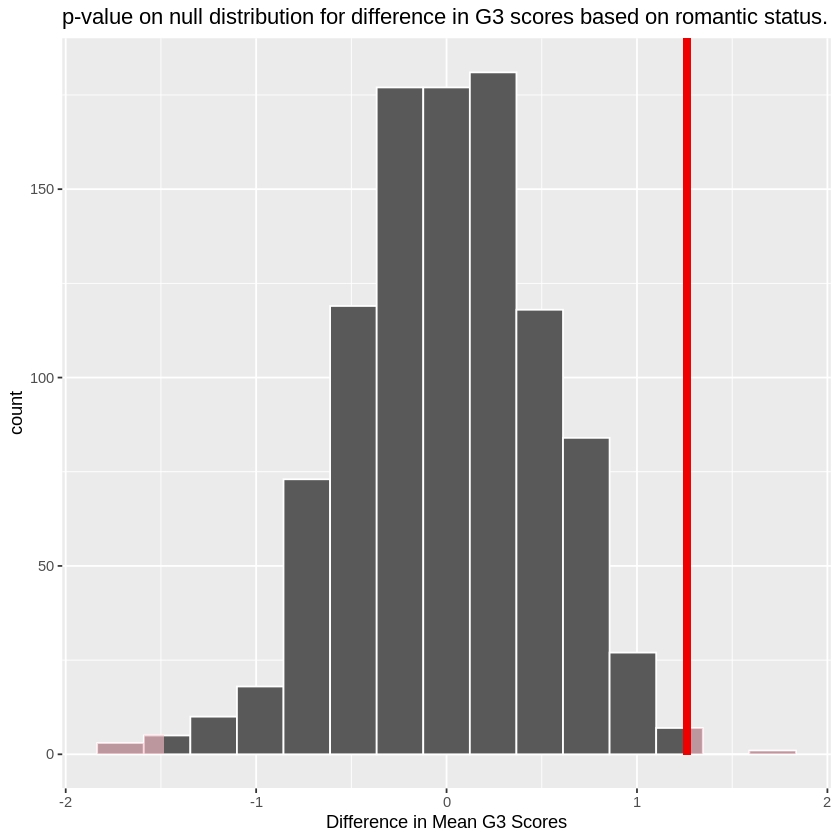

In [16]:
# 1. Calculate the observed difference in means.
obs_diff_in_means <- student_data %>%
    specify(G3 ~ romantic) %>%
    calculate(stat = "diff in means", order = c("no", "yes"))

# 2. & 3. Conduct the infer workflow.
romantic_infer <- student_data %>%
    specify(G3 ~ romantic) %>% 
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c("no", "yes"))

# 4. Visualize the distribution and p-value.
romantic_infer_vis <- romantic_infer %>% 
   visualize() + 
   shade_p_value(obs_stat = obs_diff_in_means, direction = "two_sided") +
   xlab("Difference in Mean G3 Scores") +
   labs(title = "p-value on null distribution for difference in G3 scores based on romantic status.")

print(romantic_infer_vis)

# 5. Print the p-value.
p_val <- get_p_value(romantic_infer, obs_stat = obs_diff_in_means, direction = "two_sided")$p_value
print(sprintf("Our p-value is %f", p_val))
create_caption(10, "p-value on null distribution for difference in G3 scores based on romantic status.")

#### 1.6.2.Exploration of confidence intervals：
- This code calculates confidence intervals for the mean G3 grades based on different romantic involvement statuses ("yes" and "no") using a bootstrap resampling approach. 
- It filters the bootstrap_sample by each romantic status, calculates the mean, standard error, and 95% confidence interval for each group, and then appends these results to the romantic_bootstrap_cis data frame. 
- This data frame provides insight into the range of possible mean G3 grades for each romantic status, considering sampling variability.


In [17]:
# Define columns and data frame structure
set.seed(123)
columns <- c("romantic_status", "mean_grade", "lower_ci", "upper_ci")
romantic_bootstrap_cis <- data.frame(matrix(ncol = length(columns), nrow=0))
names(romantic_bootstrap_cis) <- columns 

statuses <- unique(bootstrap_sample$romantic) # Get unique romantic statuses: "yes" and "no"

for (status in statuses) {
    # 1. Filter bootstrap sample down to just this romantic status
    romantic_data <- bootstrap_sample %>% 
        filter(romantic == status)

    # 2. Calculate the mean of the G3 scores for the romantic status in the bootstrap sample
    mean_value <- mean(romantic_data$G3)

    # Calculating standard error and confidence intervals
    std_error <- sd(romantic_data$G3) / sqrt(nrow(romantic_data))
    t_statistic <- qt(0.975, df = nrow(romantic_data) - 1) # t value for 95% CI
    lower_ci <- mean_value - t_statistic * std_error
    upper_ci <- mean_value + t_statistic * std_error

    # 3. Format and append our observed result to our `romantic_bootstrap_cis` data frame
    new_obs <- data.frame(romantic_status = status, mean_grade = mean_value, lower_ci = lower_ci, upper_ci = upper_ci)
    
    # Add the new observations to the data frame
    romantic_bootstrap_cis <- rbind(romantic_bootstrap_cis, new_obs)
}

# View results
romantic_bootstrap_cis
create_caption(10, "Confidence intervals via bootstrap")

romantic_status,mean_grade,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>
no,10.398832,10.354781,10.442884
yes,9.795644,9.742723,9.848564


[1] "Figure #10: Confidence intervals via bootstrap"


#### 1.6.3.Visual confidence intervals capture the situation
1. This code generates a visualization that allows for easy comparison of confidence intervals for mean G3 scores based on students' romantic involvement status. 
2. The color coding and vertical line provide insights into whether the overall mean falls within the intervals.
3. The confidence interval for the "no" class captures the overall mean (that is, the overall mean falls within the confidence interval for the class).
4. This means:
 - For those students who were not in a relationship, the confidence interval for the mean of their G3 scores included the overall mean of the G3 scores for all students.
 - If the confidence interval for the "yes" category does not capture the overall mean, then this indicates that the G3 scores of those students who are in a relationship may be significantly different from the overall mean.
 - In summary, the figure can help us understand the relationship between the mean value of students' G3 scores and the overall mean value in different relationship states. If the confidence interval for a certain class does not capture the overall mean, then this may be a signal to us that there may be a difference in G3 score between this particular subset and the overall data.

[1] "Figure #11: Confidence intervals via Captured or not"


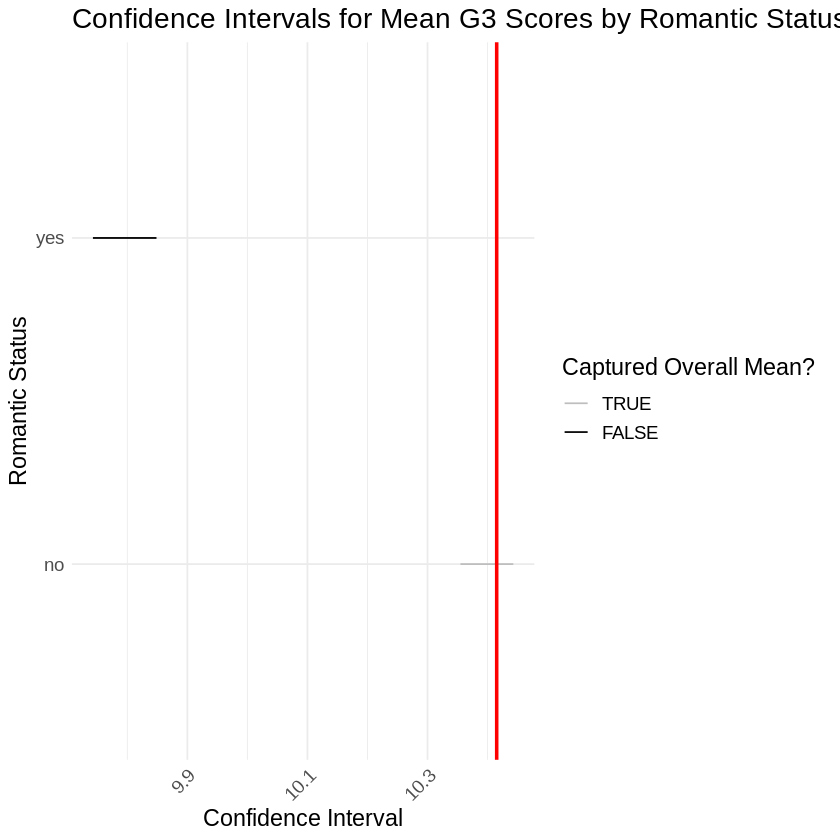

In [18]:
# Create a custom theme function
set.seed(123)
theme_stat201 <- function() {
  theme_minimal() + 
    theme(
      text = element_text(size=14), 
      axis.text.x = element_text(angle=45, hjust=1)
    )
}

# Add a new column 'captured': This column checks if the overall mean of G3 is within the confidence interval
overall_mean <- mean(student_data$G3)

romantic_bootstrap_cis <- romantic_bootstrap_cis %>%
  mutate(captured = (lower_ci <= overall_mean & overall_mean <= upper_ci))

# Visualization
many_ci_plot <- romantic_bootstrap_cis %>%
  ggplot() + 
  scale_colour_manual(breaks = c("TRUE", "FALSE"),
                      values = c("grey", "black")) + 
  geom_segment(aes(x = lower_ci,
                   xend = upper_ci,
                   y = romantic_status,
                   yend = romantic_status,
                   color = captured)) + 
  geom_vline(xintercept = overall_mean, colour = "red", size = 1) + 
  labs(title = "Confidence Intervals for Mean G3 Scores by Romantic Status",
       y = "Romantic Status",
       x = "Confidence Interval",
       colour = "Captured Overall Mean?") + 
  theme_stat201()

# Display the plot
many_ci_plot
create_caption(11, "Confidence intervals via Captured or not")

#### 1.6.4.Hypothesis testing (T-test)
1. We performed two t-tests on the G3 scores of students who were in releation or not.
- One-sample t-test: Objective: To test whether the G3 score of students in relationships is significantly lower than the average score of non-romantic students.
- Two-sample t-test: Objective: To compare the G3 scores of students who were in love or not to determine whether there was a significant difference between the two groups.

In [19]:
# Separate G3 scores of romantic and non-romantic students
romantic_g3 <- bootstrap_sample %>%
  filter(romantic == "yes") %>%
  pull(G3)

non_romantic_g3 <- bootstrap_sample %>%
  filter(romantic == "no") %>%
  pull(G3)

# Perform one-sample t-test
t_test_result <- t.test(romantic_g3, mu = mean(non_romantic_g3), alternative = "less")

# Significance level
alpha <- 0.05

# Interpret the test result
if (t_test_result$p.value <= alpha) {
  cat("Reject the null hypothesis. There is significant evidence that G3 scores of romantic students are lower than non-romantic students.\n")
} else {
  cat("Fail to reject the null hypothesis. There is no significant evidence that G3 scores of romantic students are lower than non-romantic students.\n")
}

# Print test result
cat("Calculated p-value:", t_test_result$p.value, "\n")

Reject the null hypothesis. There is significant evidence that G3 scores of romantic students are lower than non-romantic students.
Calculated p-value: 2.73418e-109 


In [20]:
t_test <- tidy(t.test(x = bootstrap_sample$G3[bootstrap_sample$romantic == "no"], 
                      y = bootstrap_sample$G3[bootstrap_sample$romantic == "yes"], 
                      paired = FALSE,
                      alternative = 'two.sided'))
t_test
create_caption(12, "Basic one-sample t-test")

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.6031887,10.39883,9.795644,17.1707,7.693811e-66,38963.99,0.5343351,0.6720423,Welch Two Sample t-test,two.sided


[1] "Figure #12: Basic one-sample t-test"


## IV. Results
4.0. Our primary objective was to discern whether students in romantic relationships had significantly different final grades (G3 scores) compared to students not in relationships.
4.1. Preliminary Inference for Hypothesis Testing:
- Our preliminary testing showed a p-value of 0.008, which is less than the conventional significance level of 0.05. 
- This suggests that there is a significant difference in the G3 scores of students based on their romantic involvement.This p-value is considerably less than the traditional alpha level of 0.05, leading to the rejection of the null hypothesis. This indicates that the observed difference in means is unlikely to be due to random chance.

4.2. Bootstrap Confidence Intervals:
- The bootstrap method was employed to construct 95% confidence intervals for the mean G3 scores for both groups:
- Students not in a romantic relationship: 10.35 - 10.44
- Students in a romantic relationship: 9.74 - 9.85
- It is noteworthy that the confidence intervals for both groups do not overlap, further substantiating the significant difference in mean G3 scores between the two categories.

4.3. Visualization of Confidence Intervals:
- The visualization illustrated the confidence intervals for both groups, with the overall mean depicted by a vertical red line.
- Notably, the confidence interval for non-romantic students included the overall mean G3 score of all students, whereas the romantic students' confidence interval did not. This underscores the difference in performance between the two groups.

4.4. T-tests:
- One-sample t-test showed a significantly lower G3 score for romantic students compared to the average score of non-romantic students, with a p-value of 2.73418e-109.
- Two-sample t-test results indicated a significant difference in G3 scores between non-romantic and romantic students. The test statistic was 17.1707, and the p-value was 7.693811e-66. The confidence interval for the mean difference ranged from approximately 0.5343 to 0.6720.
## V. Discussion and Explanation
1. The results from the hypothesis tests, confidence intervals, and t-tests consistently point to one conclusion: students who are not in romantic relationships tend to have higher mean G3 scores than those in romantic relationships.
2. Several interpretations can be drawn from this:
- Time Management: Engaging in a romantic relationship may require substantial time and emotional investment, which might detract from the time available for academic pursuits.
- Emotional Stability: Romantic relationships during adolescence can be emotionally turbulent. Emotional disturbances could hinder academic concentration and performance.
- Priorities and Distractions: Students in relationships might prioritize their romantic commitments over their academic responsibilities, leading to potential distractions and reduced academic focus.
- Societal and Peer Pressure: Adolescents face significant societal and peer pressures, which might be magnified within the context of a romantic relationship, potentially impacting academic performance.

3. However, it's crucial to note some caveats:
- Correlation ≠ Causation: While our study has identified a correlation, it does not imply causality. It is uncertain if being in a relationship directly causes lower grades or if there's another lurking variable.
- External Factors: Other factors might be influencing students' grades, like personal situations, health issues, or other commitments, which were not controlled for in our study.
- Individual Differences: While we noted a general trend, individual differences exist. Not every student in a relationship will perform poorly, and not every single student will excel academically.

4. In conclusion, while our data highlights a potential relationship between romantic involvement and academic performance, further research is needed. Future studies could delve deeper into understanding the nuances and causative factors behind this observed phenomenon, possibly incorporating qualitative methods to gain insights into students' lived experiences.

#### Question Answer: Do you think one of bootstrapping or asymptotics is more appropriate than the other?

Choosing between bootstrapping and asymptotic methods depends largely on the nature of the data and the specific problem at hand. 
1. For our study, we utilized bootstrapping to construct 95% confidence intervals around the G3 scores of students. Bootstrapping is advantageous for our dataset, especially given the potential that the data may not adhere to standard distributional assumptions. This non-parametric approach offers a flexible and robust way to estimate parameters and their uncertainties. In contrast, while asymptotic methods are computationally faster and rely on large sample theory, they require more stringent assumptions about the underlying data distribution. Given the size and characteristics of our dataset, bootstrapping emerged as a more appropriate method, providing both reliable and defensible results.

2. By approximating the sampling distribution of a statistic through resampling techniques. Where B represents the number of bootstrap samples and ∗Xi is the mean of the ith bootstrap sample.
$$
\text{Bootstrap mean} = \frac{1}{B} \sum_{i=1}^{B} X_i^*
$$

3. Asymptotics:
For large samples, as the sample size approaches infinity, the sampling distribution of many statistics approaches a normal distribution (Central Limit Theorem).
$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
$$


In [21]:
# R code to demonstrate bootstrapping for mean G3 scores
bootstrap_means <- replicate(1000, {
  sample_mean <- mean(sample(student_data$G3, size=length(student_data$G3), replace=TRUE))
  return(sample_mean)
})

## VI. Further Discussion and Support information
#### 6.1.Strengths of the Report
- Robust Data Analysis: The report employs rigorous quantitative methods, including inferential statistics and visualizations, to analyze a large and diverse dataset. This approach ensures the validity and reliability of the findings.
- Controlled Variables: By considering study time as a controlled variable, the report addresses potential confounding factors that could influence the relationship between romantic involvement and academic performance. This increases the  confidence in the study's conclusions. Moreover, the inclusion of controlled variables, such as study time, addresses potential confounding factors that could influence the relationship between romantic involvement and academic performance (Meiler & Aleen, 2009). 
- Comparative Analysis: The report conducts a comparative analysis between students in romantic relationships and those not in relationships. This approach allows for a direct examination of the impact of romantic involvement on academic outcomes, enhancing the reliability of the results.
- Inclusion of Hypothesis Testing and Confidence Intervals: The report plans to include hypothesis testing and confidence intervals in the analysis. These statistical methods provide a robust framework for drawing meaningful inferences and making valid conclusions about the population based on sample data.
#### 6.2.Limitations and Addressing Gaps
- While the report has many strengths, there are some limitations that need to be addressed to provide more comprehensive insights to stakeholders:
- Insufficient Causality Assessment: The current analysis provides associations between romantic involvement and academic performance but does not establish causality. To address this, further longitudinal studies or experimental designs may be needed to ascertain the causal relationship.
- Consideration of External Factors: The report may benefit from exploring potential external factors that could influence the relationship between romantic involvement and academic performance. Factors such as socioeconomic status, parental involvement, or psychological well-being might be relevant to consider in the analysis.
- Comparison of Bootstrap and Asymptotic Methods: To enhance the credibility of the results, the report should compare the outcomes obtained from both bootstrap and asymptotic methods. This comparison will help assess the robustness and reliability of the statistical inferences.
#### 6.3.Expected Findings and Implications

- The report aims to explore the potential impact of romantic involvement on students' academic performance.  By investigating the differences between students in romantic relationships and those not in relationships, valuable insights can be gained, which may have important implications for educational institutions and policymakers.  The findings could inform the development of support mechanisms to assist students in achieving a harmonious balance between their personal lives and academic commitments, fostering an environment conducive to both emotional well-being and academic excellence (Meeus, Iedema, Helsen, & Vollebergh, 1999).
#### 6.4.Future Implications and Potential Challenges

- The findings of this report could raise awareness of the potential academic risks associated with romantic involvement among students. Future research could delve deeper into understanding the underlying mechanisms and factors that mediate this relationship. Additionally, the report may highlight the need for targeted interventions to support students in maintaining healthy and balanced relationships while prioritizing their academic pursuits.
- However, it is essential to recognize that academic performance is influenced by multiple factors, and romantic relationships are just one aspect of students' lives. Addressing the potential challenges of implementing interventions and accounting for various confounding factors will be critical in ensuring the effectiveness and practicality of any proposed strategies.
#### 6.5.Overall
- According to Luthar, Kumar, and Zillmer (2020), high-achieving schools may connote risks for adolescents, and these risks are documented and implicate various processes. It is essential to consider these factors when conducting interventions and addressing potential issues in academic settings. Thereforem, the report's findings could contribute valuable insights to educational stakeholders and inform evidence-based decision-making in fostering students' academic success and well-being.

### VII. References

[1].Hallfors, D. D., Waller, M. W., Bauer, D., Ford, C. A., & Halpern, C. T. (2005). Which comes first in adolescence—sex and drugs or depression? American Journal of Preventive Medicine, 29(3), 163–170. https://doi.org/10.1016/j.amepre.2005.06.002 

[2].Honghao, J., Po, Y., & Tianyu, Y. (2021). The influence of adolescents’ romantic relationship on individual development: Evidence from China. International Journal of Chinese Education, 10(3), 221258682110700. https://doi.org/10.1177/22125868211070036 

[3]. Meier A, Allen G. Romantic Relationships from Adolescence to Young Adulthood: Evidence from the National Longitudinal Study of Adolescent Health. Sociol Q. 2009 Spring;50(2):308-335. doi: 10.1111/j.1533-8525.2009.01142.x. PMID: 25332511; PMCID: PMC4201847.

[4]. Luthar, S. S., Kumar, N. L., & Zillmer, N. (2020). High-achieving schools connote risks for adolescents: Problems documented, processes implicated, and directions for interventions. American Psychologist, 75(7), 983.

[5]. Meeus, W., Iedema, J., Helsen, M., & Vollebergh, W. (1999). Patterns of adolescent identity development: Review of literature and longitudinal analysis. Developmental review, 19(4), 419-461.